# Single family (SFH) vs. Multi family (MFH) homes

## Hypothesis
Our zoning code strongly discourages multi-family homes. Are city government representatives fairly representing their voters, or their districts?

In [1]:
import pandas as pd
import numpy as np
import geopandas as geo_pd
import seaborn as sns
import matplotlib.pyplot as plt

from data.connect_db import get_db

con = get_db()

%matplotlib inline

## Political divisions

In [3]:
query = "select * from \"WARDSPRECINCTS2022_POLY\""

wards_df = geo_pd.read_postgis(query, con)
wards_df = wards_df[wards_df["TOWN_ID"] == 308]
wards_df.reset_index(inplace=True)
wards_df.head()

,index,id,geom,WARD,PRECINCT,WP_DISTRIC,WP_NAME,TOWN,TOWN_ID,POP_2020,AREA_MILES,PERIMETER_,SHAPE_AREA,SHAPE_LEN
0,965,917,"MULTIPOLYGON (((218613.885 906734.2, 218621.22...",1,1,1-1,Waltham Precinct 1-1,WALTHAM,308,3738,2.49,9.71,6.443128e+06,15625.783517
1,967,918,"MULTIPOLYGON (((222337.302 902475.771, 222334....",5,2,5-2,Waltham Precinct 5-2,WALTHAM,308,3669,0.26,3.80,6.855663e+05,6113.757618
2,968,919,"MULTIPOLYGON (((221235.219 903475.163, 221287....",6,1,6-1,Waltham Precinct 6-1,WALTHAM,308,3784,0.29,2.89,7.550182e+05,4655.327881
3,969,920,"MULTIPOLYGON (((222432.008 903923.75, 222436.7...",6,2,6-2,Waltham Precinct 6-2,WALTHAM,308,3595,0.49,4.51,1.258103e+06,7265.495350
4,983,945,"MULTIPOLYGON (((221652.369 902207.262, 221646....",8,1,8-1,Waltham Precinct 8-1,WALTHAM,308,3762,0.32,3.07,8.169073e+05,4934.265491


## Property tax parcels

In [5]:

query = "select * from \"M308TaxPar_CY22_FY23\""

property_shapefiles_df = geo_pd.read_postgis(query, con)
property_shapefiles_df['centroid'] = property_shapefiles_df['geom'].apply(lambda x: x.centroid)

query = "select * from \"M308Assess_CY22_FY23\""

assessments_df = pd.read_sql(query, con)

def home_style(x):
    if int(x) == 101:
        return "SFH"
    elif int(x) > 102 and int(x) <= 112:
        return "MFH"

    return "OTHER OR NON HOME"

assessments_df["HOME_STYLE"] = assessments_df["USE_CODE"].apply(lambda x: home_style(x))

property_shapefiles_df.head() 

,id,geom,SHAPE_Leng,SHAPE_Area,MAP_PAR_ID,LOC_ID,POLY_TYPE,MAP_NO,SOURCE,PLAN_ID,LAST_EDIT,BND_CHK,NO_MATCH,TOWN_ID,centroid
0,1,"MULTIPOLYGON (((219510.406 900516.563, 219505....",106.284365,416.922636,R079 001 0038,F_720118_2954451,FEE,079,ASSESS,None,20111130,OK,N,308,POINT (219492.454 900518.533)
1,2,"MULTIPOLYGON (((219521.229 900544.743, 219512....",124.114669,875.162824,R079 001 0036,F_720144_2954524,FEE,079,ASSESS,None,20111130,OK,N,308,POINT (219500.236 900540.754)
2,3,"MULTIPOLYGON (((220212.276 900527.633, 220199....",89.087299,415.368750,R080 002 0014,F_722474_2954539,FEE,080,ASSESS,None,20111130,OK,N,308,POINT (220210.372 900545.361)
3,4,"MULTIPOLYGON (((219481.807 900560.359, 219483....",190.134403,1076.273990,R079 001 0037,F_720055_2954540,FEE,079,ASSESS,None,20111130,OK,N,308,POINT (219473.17 900545.465)
4,5,"MULTIPOLYGON (((219530.434 900568.77, 219524.3...",102.019748,615.329243,R079 001 0033,F_720183_2954604,FEE,079,ASSESS,None,20111130,OK,N,308,POINT (219512.264 900565.209)


In [6]:
assessments_df

,id,PROP_ID,LOC_ID,BLDG_VAL,LAND_VAL,OTHER_VAL,TOTAL_VAL,FY,LOT_SIZE,LS_DATE,...,BLD_AREA,UNITS,RES_AREA,STYLE,STORIES,NUM_ROOMS,LOT_UNITS,CAMA_ID,TOWN_ID,HOME_STYLE
0,1,R063 002 0017,F_734012_2963106,257400,392000,7300,656700,2023,0.11,20080930,...,1352,1,1352,COLONIAL,2,6,A,28,308,SFH
1,2,R015 004 0001,F_730830_2973583,236500,388900,0,625400,2023,0.22,20080422,...,1931,1,1931,RANCH,1,5,A,46,308,SFH
2,3,R015 003 0017,F_730659_2973534,171600,382200,5200,559000,2023,0.21,19770301,...,1756,1,1756,CONVENTIONAL,2,7,A,55,308,SFH
3,4,R015 005 0001,F_730718_2973342,400200,391900,6100,798200,2023,0.23,20061205,...,2922,1,2922,COLONIAL,2,6,A,64,308,SFH
4,5,R015 006 0006,F_730548_2973294,369300,382600,2700,754600,2023,0.21,20050315,...,1792,1,1792,COLONIAL,2,8,A,73,308,SFH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16509,16510,R032 001 022B,F_724665_2970529,709400,299900,0,1009300,2023,0.13,20220308,...,3374,1,3374,COLONIAL,2,7,A,212623,308,SFH
16510,16511,R025 003 012A,F_731918_2972585,148100,344100,0,492200,2023,0.12,20210505,...,2255,1,2255,COLONIAL,2,7,A,212624,308,SFH
16511,16512,R025 003 012B,F_731940_2972635,187700,354200,0,541900,2023,0.14,20210505,...,3592,1,3592,COLONIAL,2,8,A,212625,308,SFH
16512,16513,R016 006 001B,F_731686_2973257,738800,366000,0,1104800,2023,0.17,20220610,...,2782,1,2782,COLONIAL,2,8,A,212626,308,SFH


## Stucture types in data

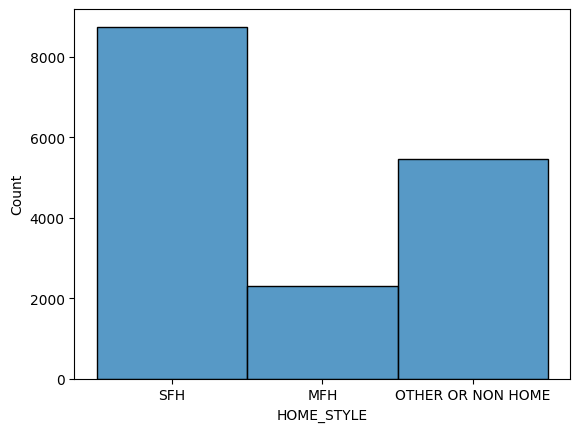

In [7]:
ax = sns.histplot(data=assessments_df, x="HOME_STYLE", kde=False)

In [8]:
assessments_df["HOME_STYLE"].value_counts()

HOME_STYLE
SFH                  8743
OTHER OR NON HOME    5461
MFH                  2310
Name: count, dtype: int64

In [9]:
# merge tax dfs together
properties_df = property_shapefiles_df.merge(assessments_df, left_on=["MAP_PAR_ID", "LOC_ID", "TOWN_ID"], right_on=["PROP_ID", "LOC_ID", "TOWN_ID"], how="outer")

# find wards they belong to
properties_df = properties_df.sjoin(wards_df, how="left", predicate="within")

# filter out invalid properties
properties_df = properties_df[~properties_df["MAP_PAR_ID"].isna()]
properties_df = properties_df[~properties_df["WARD"].isna()]

# some type corrections
properties_df["WARD"] = properties_df["WARD"].astype(int)

properties_df.head()

,id_x,geom,SHAPE_Leng,SHAPE_Area,MAP_PAR_ID,LOC_ID,POLY_TYPE,MAP_NO,SOURCE,PLAN_ID,...,PRECINCT,WP_DISTRIC,WP_NAME,TOWN,TOWN_ID_right,POP_2020,AREA_MILES,PERIMETER_,SHAPE_AREA,SHAPE_LEN
0,13168.0,"MULTIPOLYGON (((219119.539 908057.176, 219162....",724.133797,24123.628491,R001 001 0002,F_718801_2978813,FEE,001,ASSESS,None,...,1,3-1,Waltham Precinct 3-1,WALTHAM,308.0,3565.0,2.01,7.63,5.216220e+06,12281.915485
1,13116.0,"MULTIPOLYGON (((219118.68 907891.077, 219089.6...",278.017874,1700.896665,R001 001 0003,F_718775_2978552,FEE,001,ASSESS,None,...,1,3-1,Waltham Precinct 3-1,WALTHAM,308.0,3565.0,2.01,7.63,5.216220e+06,12281.915485
2,13083.0,"MULTIPOLYGON (((219106.77 907823.339, 219097.2...",153.113870,1308.694875,R001 001 0004,F_718766_2978353,FEE,001,ASSESS,None,...,1,3-1,Waltham Precinct 3-1,WALTHAM,308.0,3565.0,2.01,7.63,5.216220e+06,12281.915485
3,13070.0,"MULTIPOLYGON (((219058.896 907772.872, 219041....",271.856331,3209.370345,R001 002 0001,F_718590_2978145,FEE,001,ASSESS,None,...,1,3-1,Waltham Precinct 3-1,WALTHAM,308.0,3565.0,2.01,7.63,5.216220e+06,12281.915485
6,13179.0,"MULTIPOLYGON (((219466.74 908048.356, 219461.7...",237.104754,2797.433684,R002 001 0004,F_719904_2979226,FEE,002,ASSESS,None,...,1,3-1,Waltham Precinct 3-1,WALTHAM,308.0,3565.0,2.01,7.63,5.216220e+06,12281.915485


## Which home types dominate each ward?

Only 8 and 9 have majority MFH, with 5 and 6 closest to parity.

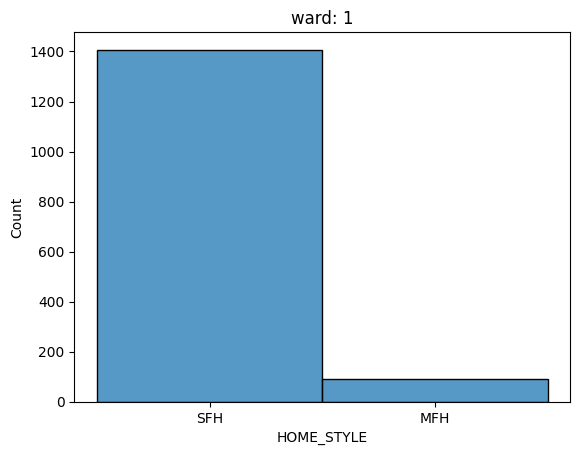

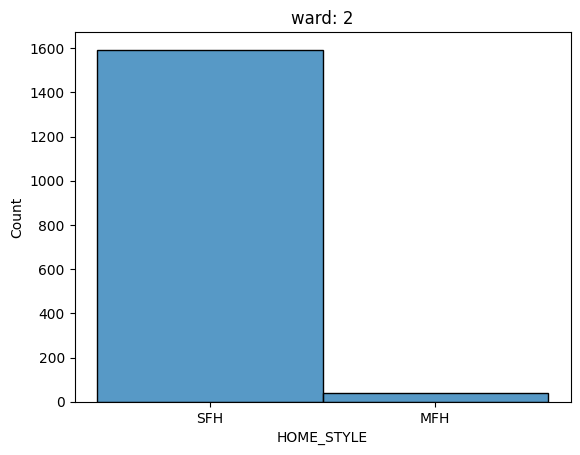

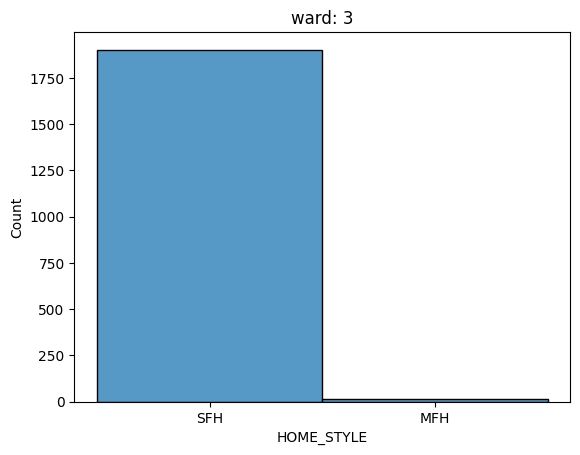

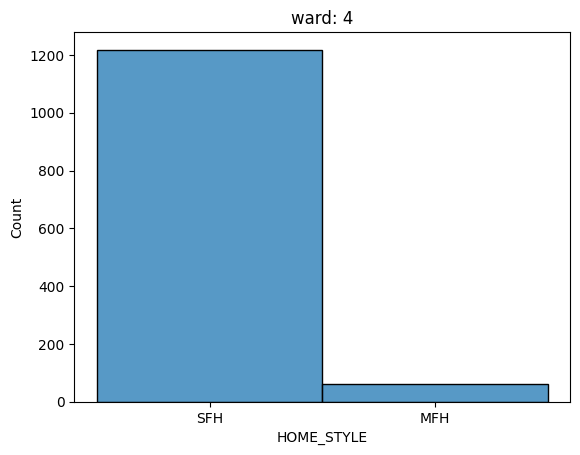

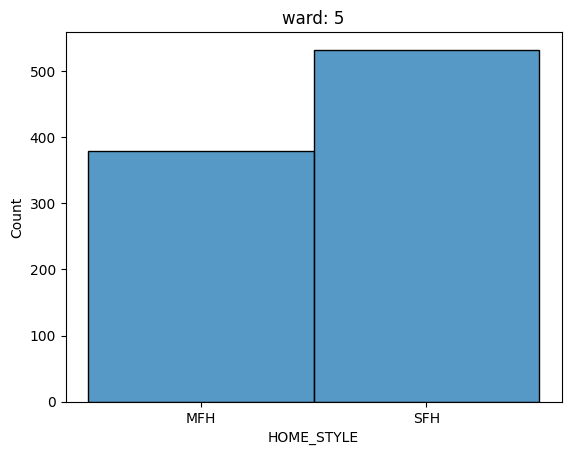

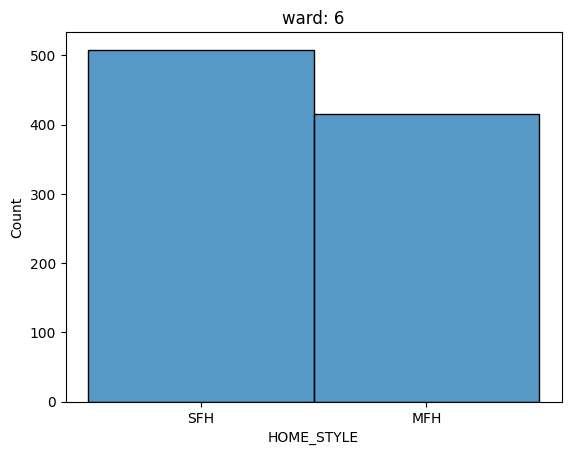

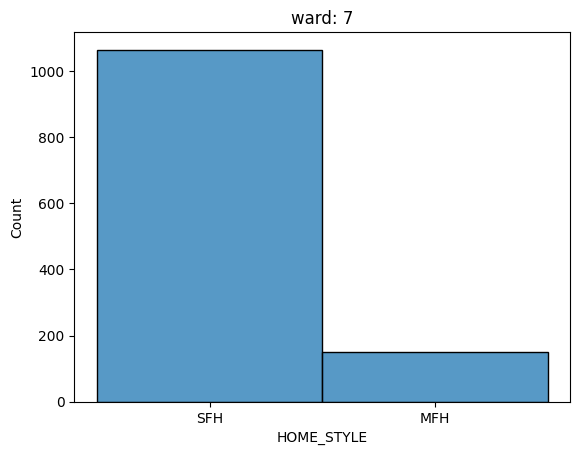

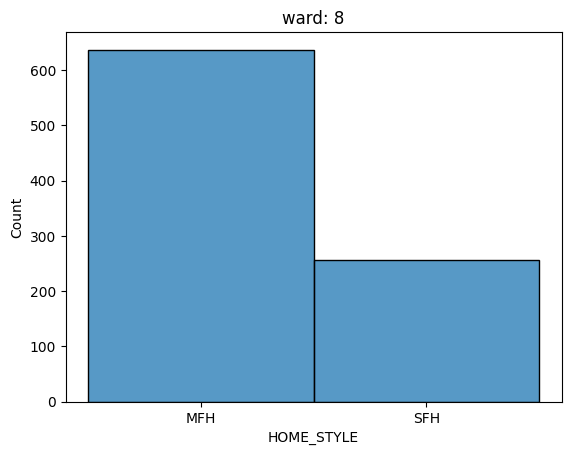

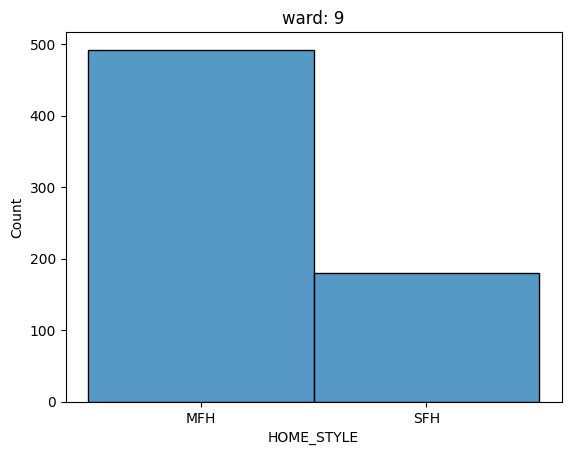

In [10]:
for ward in np.sort(properties_df["WARD"].unique()):
    c = (properties_df["WARD"] == ward) & (properties_df["HOME_STYLE"].isin(["SFH", "MFH"]))
    ax = sns.histplot(data=properties_df[c], x="HOME_STYLE", kde=False)
    ax.set_title(f"ward: {ward}")
    plt.show()

## Sum of units in each ward by type

The above just shows the structures; in which wards are there more total units in MFH vs in SFH?

In [11]:
properties_df.columns

Index(['id_x', 'geom', 'SHAPE_Leng', 'SHAPE_Area', 'MAP_PAR_ID', 'LOC_ID',
       'POLY_TYPE', 'MAP_NO', 'SOURCE', 'PLAN_ID', 'LAST_EDIT', 'BND_CHK',
       'NO_MATCH', 'TOWN_ID_left', 'centroid', 'id_y', 'PROP_ID', 'BLDG_VAL',
       'LAND_VAL', 'OTHER_VAL', 'TOTAL_VAL', 'FY', 'LOT_SIZE', 'LS_DATE',
       'LS_PRICE', 'USE_CODE', 'SITE_ADDR', 'ADDR_NUM', 'FULL_STR', 'LOCATION',
       'CITY', 'ZIP', 'OWNER1', 'OWN_ADDR', 'OWN_CITY', 'OWN_STATE', 'OWN_ZIP',
       'OWN_CO', 'LS_BOOK', 'LS_PAGE', 'REG_ID', 'ZONING', 'YEAR_BUILT',
       'BLD_AREA', 'UNITS', 'RES_AREA', 'STYLE', 'STORIES', 'NUM_ROOMS',
       'LOT_UNITS', 'CAMA_ID', 'HOME_STYLE', 'index_right0', 'index', 'id',
       'WARD', 'PRECINCT', 'WP_DISTRIC', 'WP_NAME', 'TOWN', 'TOWN_ID_right',
       'POP_2020', 'AREA_MILES', 'PERIMETER_', 'SHAPE_AREA', 'SHAPE_LEN'],
      dtype='object')

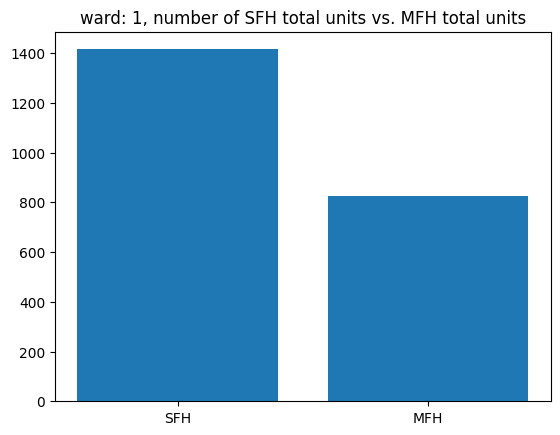

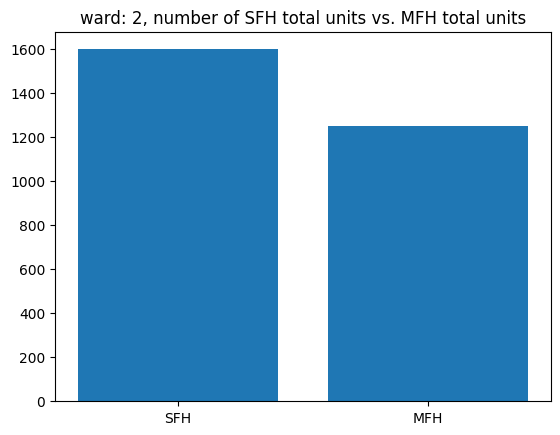

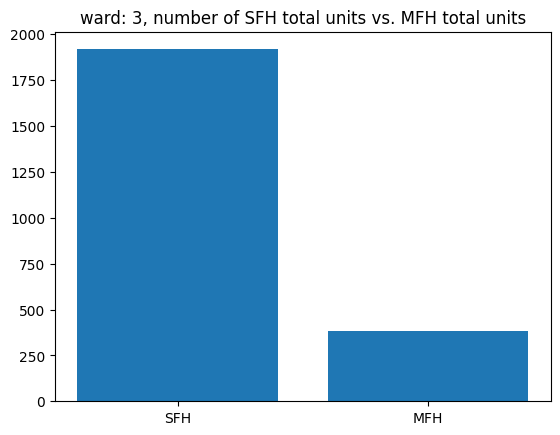

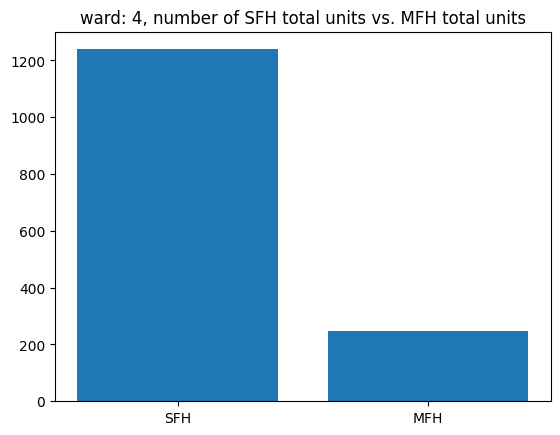

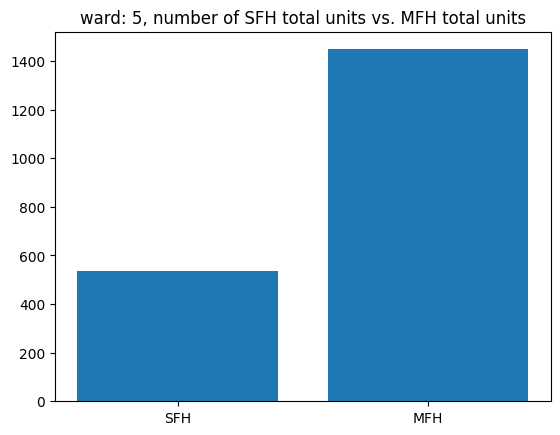

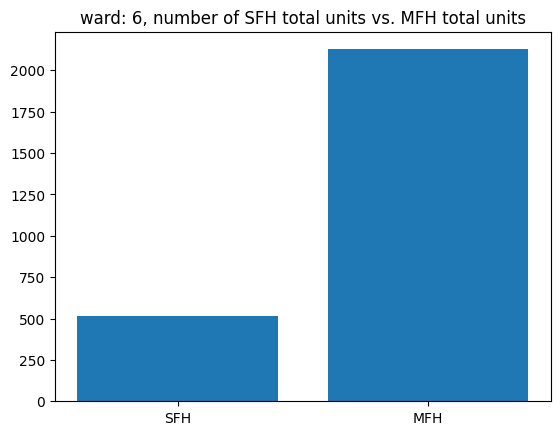

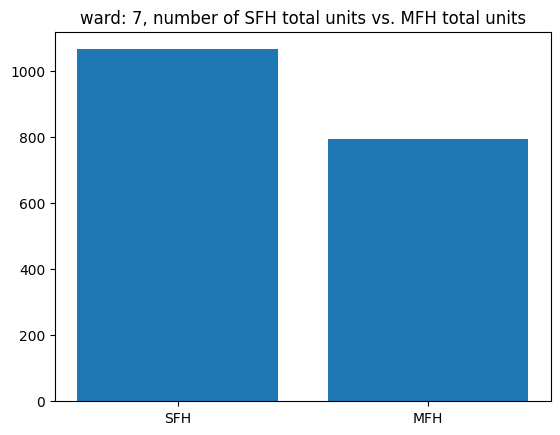

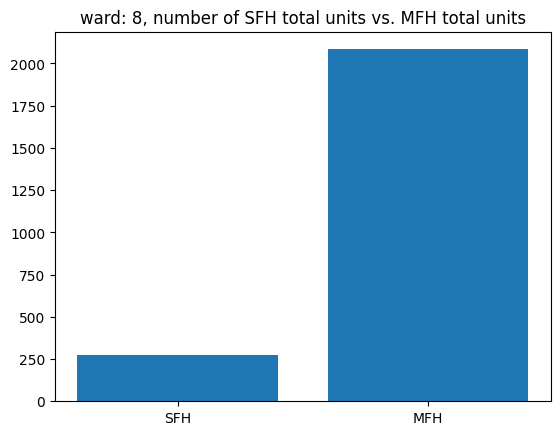

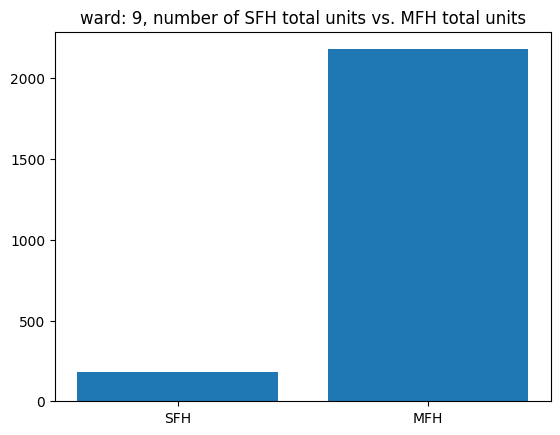

In [12]:
for ward in np.sort(properties_df["WARD"].unique()):
    fig, ax = plt.subplots()
    sum_sfh_units = properties_df[(properties_df["WARD"] == ward) & (properties_df["HOME_STYLE"] == "SFH")]["UNITS"].sum()
    sum_mfh_units = properties_df[(properties_df["WARD"] == ward) & (properties_df["HOME_STYLE"] == "MFH")]["UNITS"].sum()
    ax.bar(['SFH', 'MFH'], [sum_sfh_units, sum_mfh_units])
    ax.set_title(f"ward: {ward}, number of SFH total units vs. MFH total units")
    plt.show()